In [1]:
# For analysis and numerical functions
import pandas as pd
import numpy as np

# For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings(action='ignore')


In [2]:
# reading the datasest
df  = pd.read_csv('day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
df.shape

(730, 16)

In [4]:
#checking the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# checking null value

In [5]:
# null vlue code
df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [6]:
#drop the unimportant  columns
df.drop(['instant','dteday','casual','registered','atemp'],axis = 1,inplace = True)

In [7]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,48.3333,23.500518,1796


# Pre-procesing steps

In [8]:
# splitting the varaible into categorical and continous columns 
cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
cont_cols = ['temp','hum','windspeed']
target = ['cnt']
len(cat_cols) + len(cont_cols) + len(target) # checking wheather all columns we take

11

# mapping

AS WE SEE THERE ARE MANY CATEGORICAL VALUES WHICH ARE NON-BINARY , WE HAVE TO MAP THAT 

In [9]:
# mapping column season--
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)

In [10]:
# mapping column month--
df['mnth'].replace({1:"January",2:"Feburary",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",
                    9:"September",10:"October",11:"November",12:"December"},inplace=True)

In [11]:
# mapping column weekday--
df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)

In [12]:
# mapping column weathersit
df['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",
                          4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)

In [13]:
#checking whether the mapping is properly done..
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist_cloudy,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist_cloudy,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear_Few Clouds,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear_Few Clouds,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear_Few Clouds,9.305237,43.6957,12.522300,1600


# EDA

# Univaraite analysis

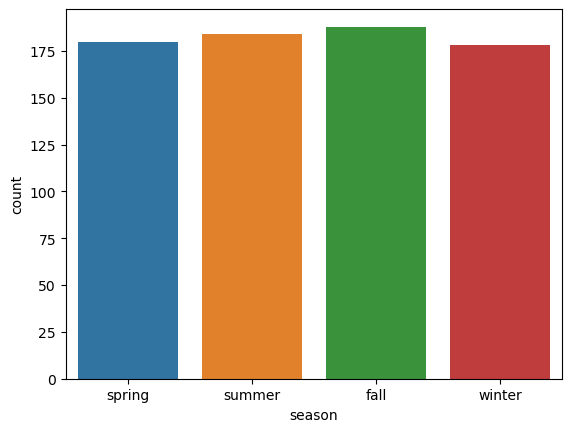

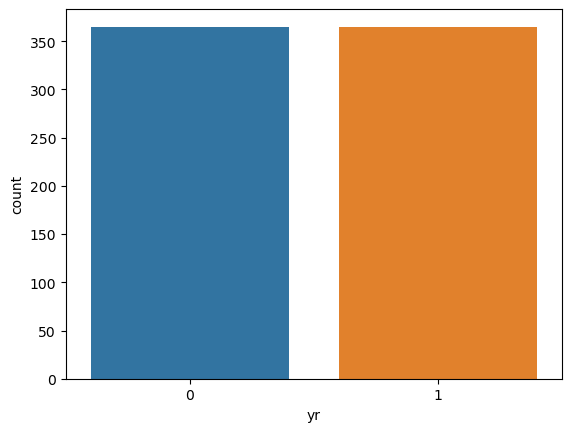

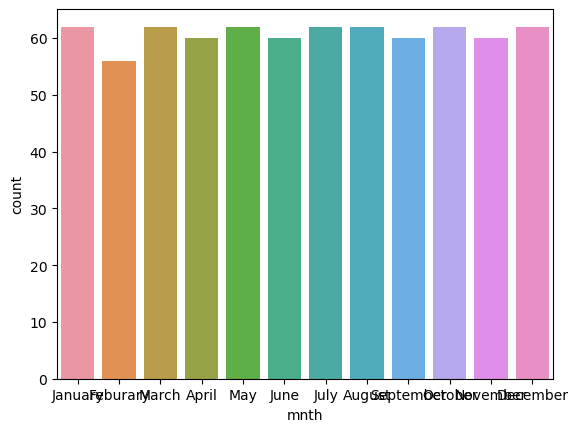

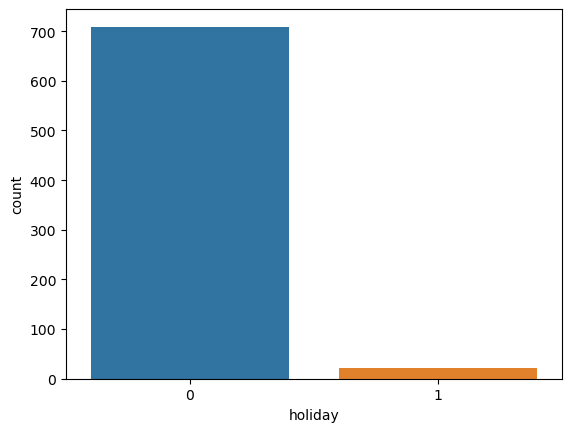

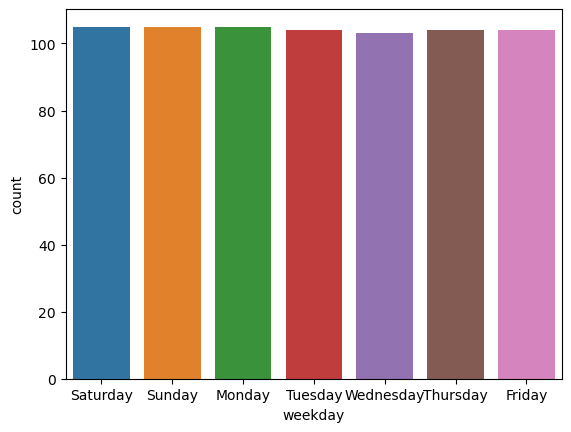

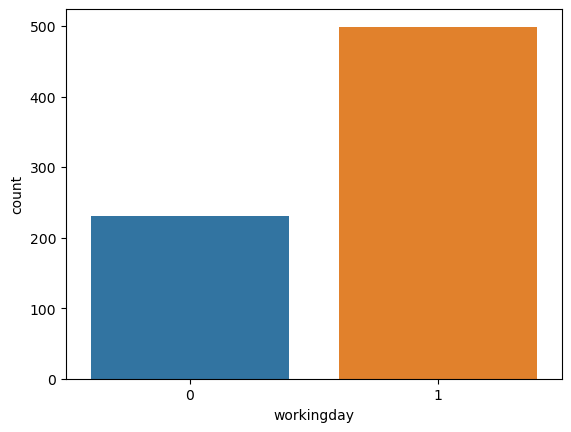

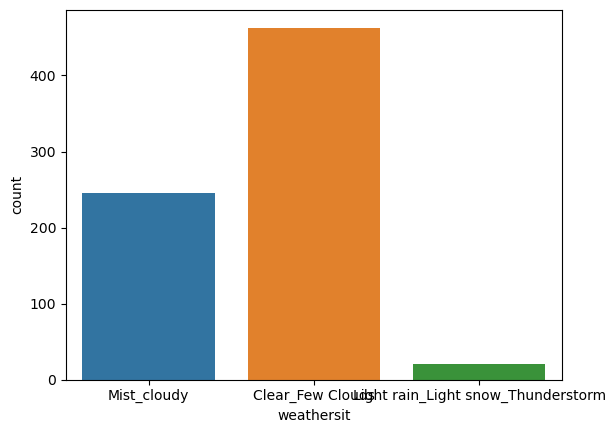

In [14]:
# showing countplot for univaraite categorical columns in loop 
for i in cat_cols:
    sns.countplot(x = df[i])
    plt.show()

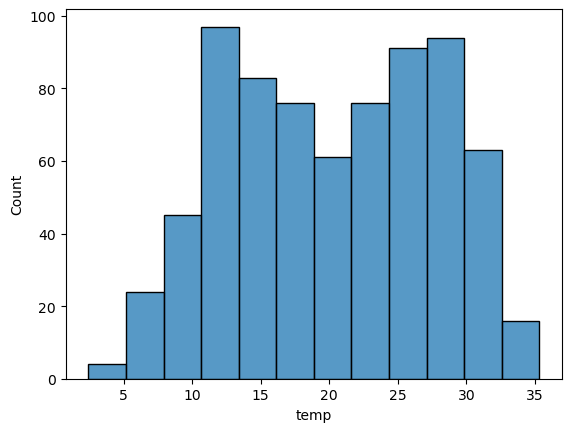

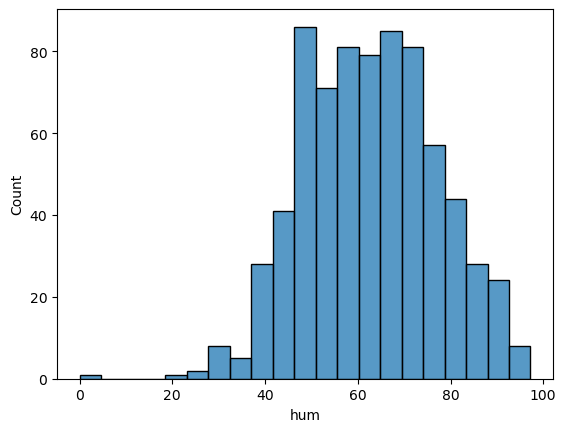

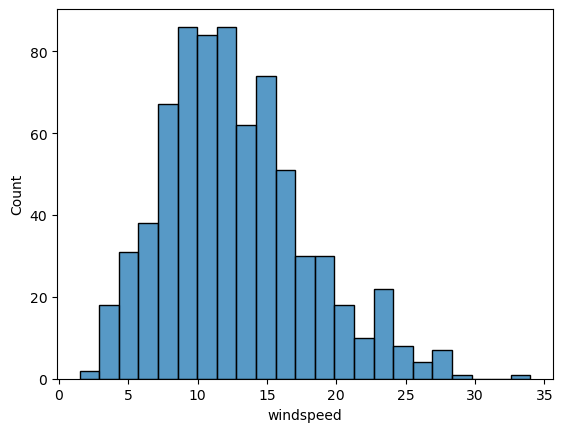

In [15]:
# using sns to show histplot of univaraite continous columns 
for i in cont_cols:
    sns.histplot(df[i])
    plt.show()

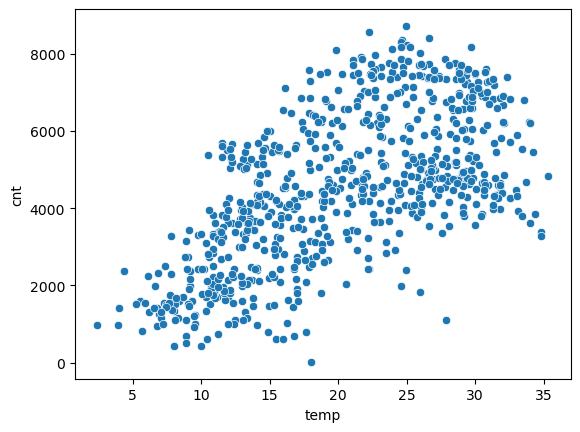

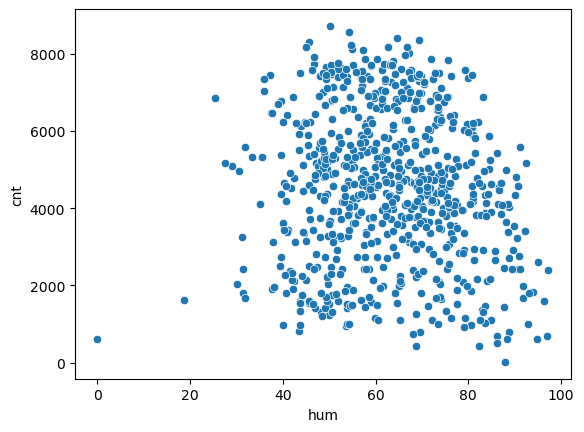

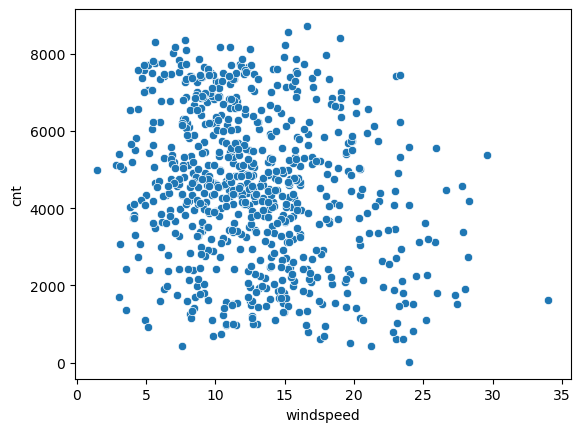

In [16]:
# using target varaible what relation with continous columns 
for i in cont_cols:
    sns.scatterplot(x =df[i],y = df['cnt'])
    plt.show()

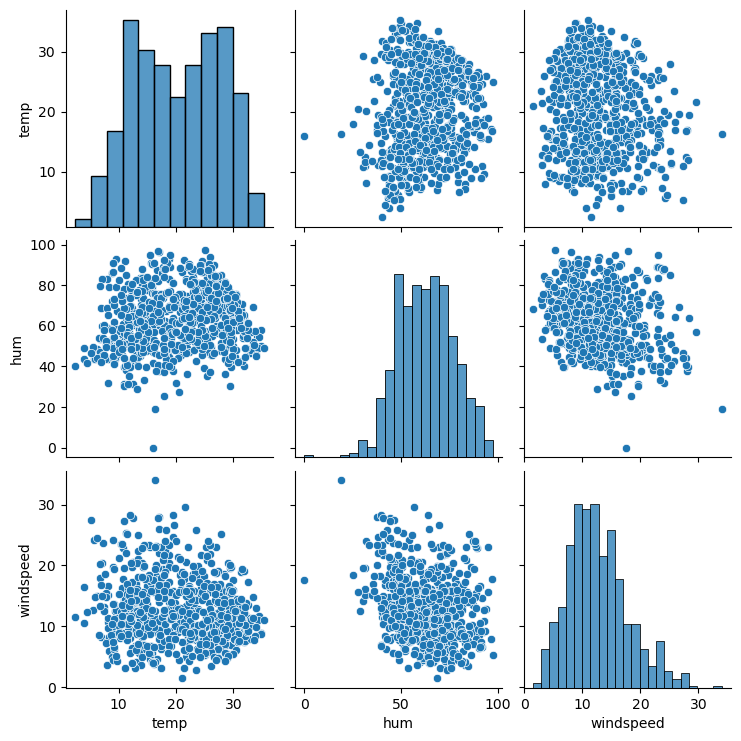

In [17]:
sns.pairplot(df[cont_cols])
plt.show()

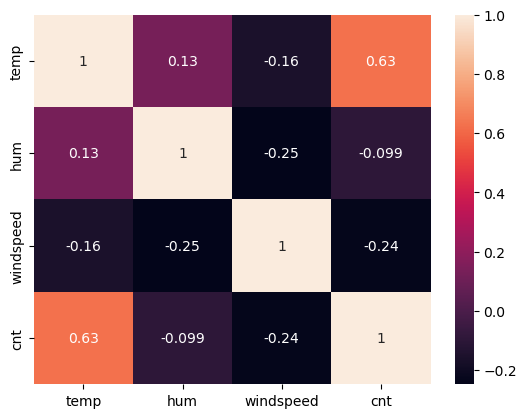

In [18]:
# also using heat map to see the relation of varaible with target columns
sns.heatmap(df[cont_cols +['cnt']].corr(),annot = True)
plt.show()

# dummy varaible creation

In [19]:
#Dummy variables for season, mnth, weekday, weathersit
dum1=pd.get_dummies(df.season,drop_first=True)
dum2=pd.get_dummies(df.mnth,drop_first=True)
dum3=pd.get_dummies(df.weekday,drop_first=True)
dum4=pd.get_dummies(df.weathersit,drop_first=True)

In [20]:
# Combining the results to dataframe
df1=pd.concat([dum1,dum2,dum3,dum4,df],axis=1)
df1.head()

,spring,summer,winter,August,December,Feburary,January,July,June,March,...,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,January,0,Saturday,0,Mist_cloudy,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,January,0,Sunday,0,Mist_cloudy,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,January,0,Monday,1,Clear_Few Clouds,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,January,0,Tuesday,1,Clear_Few Clouds,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,January,0,Wednesday,1,Clear_Few Clouds,9.305237,43.6957,12.522300,1600


In [21]:
# Drop 'season','mnth','weekday','weathersit' 
df1.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)
df1.head()

,spring,summer,winter,August,December,Feburary,January,July,June,March,...,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


# train-test split

In [22]:
# splitting the independent and dependent varaible 
x=df1.drop(["cnt"],axis=1)
y=df1["cnt"]

In [23]:
# code for taking train and test data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 100)

In [24]:
x_train.shape

(511, 28)

In [25]:
x_test.shape

(219, 28)

# Scaling

In [26]:
# import the library for scaling
from sklearn.preprocessing import MinMaxScaler

In [27]:
# taking function in scaler varaible
scaler = MinMaxScaler()

In [28]:
# scaling  the varaible into MinMaxScaler
x_train[cont_cols] = scaler.fit_transform(x_train[cont_cols])
x_train.head()

,spring,summer,winter,August,December,Feburary,January,July,June,March,...,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy,yr,holiday,workingday,temp,hum,windspeed
653,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0.509887,0.575354,0.300794
576,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0.442393,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0.395666,0.504508,0.188475


In [29]:
# checking whether scaling done properly
x_test[cont_cols] = scaler.fit_transform(x_test[cont_cols])
x_test.head(5)

,spring,summer,winter,August,December,Feburary,January,July,June,March,...,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy,yr,holiday,workingday,temp,hum,windspeed
184,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0.837241,0.534223,0.149393
535,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0.911423,0.470417,0.231142
299,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0.496221,0.777843,0.443398
221,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0.890387,0.236659,0.449707
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0.821739,0.070765,0.682387


# Modelling

# feature selection - Recursive elemination feature

In [30]:
# import library  of RFE and linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# here taking estimator for linear regression and RFE to select number of feature to choose by dropping other
estimator = LinearRegression()
selector = RFE(estimator,n_features_to_select = 15)

# selector select the feature we want from train data
selector = selector.fit(x_train,y_train)
selected_features = list(x_train.columns[selector.support_])
selected_features

['spring',
 'winter',
 'January',
 'July',
 'September',
 'Saturday',
 'Sunday',
 'Light rain_Light snow_Thunderstorm',
 'Mist_cloudy',
 'yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed']

In [31]:
# taking the feature in train an test data we choose by RFE
x_train = x_train[selected_features]
x_test = x_test[selected_features]

In [32]:
# adding the constant feature to data
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
x_test_sm = sm.add_constant(x_test)

In [33]:
# making model for prediction
model1 = sm.OLS(y_train,x_train_sm)
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.7
Date:                Thu, 04 May 2023   Prob (F-statistic):          3.43e-190
Time:                        18:10:44   Log-Likelihood:                -4120.8
No. Observations:                 511   AIC:                             8272.
Df Residuals:                     496   BIC:                             8335.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               2206.5088    220.917      9.988      0.000    1772.461    2640.557
spring                              -859.9503    132.770     -6.477      0.000   -1120.811    -599.090
winter                               460.9515    107.613      4.283      0.000     249.518     672.385
January                             -350.5662    151.816     -2.309      0.021    -648.848     -52.284
July                                -651.0474    148.693     -4.378      0.000    -943.193    -358.901
September                            518.8938    133.873      3.876      0.000     255.865     781.922
Saturday                             932.0094     99.077      9.407      0.000     737.347    1126.672
Sunday                               470.0082    104.029      4.518      0.000     265.617     674.400
Light rain_Light snow_Thunderstorm -2198.5111    228.571     -9.619      0.000   -2647.598   -1749.424
Mist_cloudy                         -503.9055     90.996     -5.538      0.000    -682.691    -325.120
yr                                  2017.6880     70.305     28.699      0.000    1879.556    2155.820
holiday                              -43.7346    185.116     -0.236      0.813    -407.443     319.974
workingday                           848.2257     80.629     10.520      0.000     689.809    1006.643
temp                                4002.6442    273.433     14.638      0.000    3465.414    4539.875
hum                                -1254.6113    326.540     -3.842      0.000   -1896.183    -613.040
windspeed                          -1527.8054    222.499     -6.867      0.000   -1964.962   -1090.649
==============================================================================
Omnibus:                       62.889   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.779
Skew:                          -0.627   Prob(JB):                     2.02e-35
Kurtosis:                       5.435   Cond. No.                     3.76e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.05e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# variance inflaton factor

In [34]:
# here importing the library to finding VIF to check multicolinearity  
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Feature"]=x_train.columns

vif_data["VIF"]=[variance_inflation_factor(x_train.values,i) for i in range(len(x_train.columns))]
vif_data

,Feature,VIF
0,spring,2.716389
1,winter,1.813527
2,January,1.552009
3,July,1.306917
4,September,1.108994
5,Saturday,10.133325
6,Sunday,9.809221
7,Light rain_Light snow_Thunderstorm,1.248175
8,Mist_cloudy,1.567708
9,yr,1.035799


In [35]:
# droping the workingday as its VIF very high
x_train=x_train.drop(["workingday"],axis=1)
x_test=x_test.drop(["workingday"],axis=1)

In [36]:
# taking the changes of dropping column in x_train_sm
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [37]:
# model after dropping the workingday
model2=sm.OLS(y_train,x_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.7
Date:                Thu, 04 May 2023   Prob (F-statistic):          3.43e-190
Time:                        18:10:44   Log-Likelihood:                -4120.8
No. Observations:                 511   AIC:                             8272.
Df Residuals:                     496   BIC:                             8335.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               3054.7345    270.870     11.277      0.000    2522.540    3586.929
spring                              -859.9503    132.770     -6.477      0.000   -1120.811    -599.090
winter                               460.9515    107.613      4.283      0.000     249.518     672.385
January                             -350.5662    151.816     -2.309      0.021    -648.848     -52.284
July                                -651.0474    148.693     -4.378      0.000    -943.193    -358.901
September                            518.8938    133.873      3.876      0.000     255.865     781.922
Saturday                              83.7837     97.753      0.857      0.392    -108.276     275.844
Sunday                              -378.2175    101.286     -3.734      0.000    -577.221    -179.214
Light rain_Light snow_Thunderstorm -2198.5111    228.571     -9.619      0.000   -2647.598   -1749.424
Mist_cloudy                         -503.9055     90.996     -5.538      0.000    -682.691    -325.120
yr                                  2017.6880     70.305     28.699      0.000    1879.556    2155.820
holiday                             -891.9604    222.557     -4.008      0.000   -1329.231    -454.689
temp                                4002.6442    273.433     14.638      0.000    3465.414    4539.875
hum                                -1254.6113    326.540     -3.842      0.000   -1896.183    -613.040
windspeed                          -1527.8054    222.499     -6.867      0.000   -1964.962   -1090.649
==============================================================================
Omnibus:                       62.889   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.779
Skew:                          -0.627   Prob(JB):                     2.02e-35
Kurtosis:                       5.435   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# dropping the saturday as it have pvalue greater 
x_train=x_train.drop(["Saturday"],axis=1)
x_test=x_test.drop(["Saturday"],axis=1)

In [39]:
# again adding the changes in update in x_data
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [40]:
model3=sm.OLS(y_train,x_train_sm)
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     207.5
Date:                Thu, 04 May 2023   Prob (F-statistic):          3.37e-191
Time:                        18:10:44   Log-Likelihood:                -4121.2
No. Observations:                 511   AIC:                             8270.
Df Residuals:                     497   BIC:                             8330.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               3075.5835    269.704     11.404      0.000    2545.683    3605.484
spring                              -859.1508    132.731     -6.473      0.000   -1119.934    -598.367
winter                               463.9127    107.529      4.314      0.000     252.646     675.180
January                             -349.2340    151.768     -2.301      0.022    -647.419     -51.049
July                                -648.3493    148.620     -4.362      0.000    -940.350    -356.348
September                            520.1025    133.830      3.886      0.000     257.160     783.045
Sunday                              -393.7994     99.615     -3.953      0.000    -589.517    -198.081
Light rain_Light snow_Thunderstorm -2195.3270    228.480     -9.608      0.000   -2644.232   -1746.422
Mist_cloudy                         -502.4669     90.957     -5.524      0.000    -681.174    -323.760
yr                                  2015.5184     70.240     28.695      0.000    1877.514    2153.523
holiday                             -908.5357    221.656     -4.099      0.000   -1344.034    -473.037
temp                                3999.9968    273.343     14.634      0.000    3462.947    4537.047
hum                                -1265.0807    326.224     -3.878      0.000   -1906.029    -624.132
windspeed                          -1521.1119    222.302     -6.843      0.000   -1957.880   -1084.344
==============================================================================
Omnibus:                       59.401   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.955
Skew:                          -0.582   Prob(JB):                     1.36e-34
Kurtosis:                       5.443   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
x_train=x_train.drop(["Sunday"],axis=1)
x_test=x_test.drop(["Sunday"],axis=1)

In [42]:
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [43]:
model4=sm.OLS(y_train,x_train_sm)
res4=model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Thu, 04 May 2023   Prob (F-statistic):          4.75e-189
Time:                        18:10:44   Log-Likelihood:                -4129.1
No. Observations:                 511   AIC:                             8284.
Df Residuals:                     498   BIC:                             8339.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               3058.6214    273.602     11.179      0.000    2521.065    3596.177
spring                              -863.9507    134.661     -6.416      0.000   -1128.524    -599.377
winter                               453.0557    109.061      4.154      0.000     238.779     667.332
January                             -339.4717    153.960     -2.205      0.028    -641.963     -36.980
July                                -672.8234    150.656     -4.466      0.000    -968.823    -376.823
September                            532.0868    135.747      3.920      0.000     265.380     798.793
Light rain_Light snow_Thunderstorm -2126.6457    231.140     -9.201      0.000   -2580.775   -1672.516
Mist_cloudy                         -471.5964     91.942     -5.129      0.000    -652.238    -290.954
yr                                  2014.0768     71.264     28.262      0.000    1874.063    2154.091
holiday                             -845.5691    224.307     -3.770      0.000   -1286.273    -404.865
temp                                4032.3119    277.204     14.546      0.000    3487.678    4576.946
hum                                -1358.1384    330.118     -4.114      0.000   -2006.734    -709.543
windspeed                          -1539.0313    225.497     -6.825      0.000   -1982.073   -1095.989
==============================================================================
Omnibus:                       56.360   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.528
Skew:                          -0.585   Prob(JB):                     1.01e-29
Kurtosis:                       5.214   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
vif_data=pd.DataFrame()
vif_data["Feature"]=x_train.columns

vif_data["VIF"]=[variance_inflation_factor(x_train.values,i) for i in range(len(x_train.columns))]
vif_data

,Feature,VIF
0,spring,2.900536
1,winter,2.109017
2,January,1.664375
3,July,1.406891
4,September,1.202101
5,Light rain_Light snow_Thunderstorm,1.213954
6,Mist_cloudy,2.236852
7,yr,2.070472
8,holiday,1.043123
9,temp,15.950002


In [45]:
x_train=x_train.drop(["holiday"],axis=1)
x_test=x_test.drop(["holiday"],axis=1)

In [46]:
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [47]:
model5=sm.OLS(y_train,x_train_sm)
res5=model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     229.5
Date:                Thu, 04 May 2023   Prob (F-statistic):          3.29e-187
Time:                        18:10:44   Log-Likelihood:                -4136.3
No. Observations:                 511   AIC:                             8297.
Df Residuals:                     499   BIC:                             8347.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               3049.7720    277.190     11.002      0.000    2505.170    3594.374
spring                              -886.0946    136.302     -6.501      0.000   -1153.891    -618.298
winter                               427.9530    110.289      3.880      0.000     211.265     644.641
January                             -347.0185    155.972     -2.225      0.027    -653.460     -40.577
July                                -664.5075    152.621     -4.354      0.000    -964.366    -364.649
September                            500.5536    137.270      3.646      0.000     230.855     770.253
Light rain_Light snow_Thunderstorm -2089.7481    233.970     -8.932      0.000   -2549.435   -1630.061
Mist_cloudy                         -456.0538     93.057     -4.901      0.000    -638.886    -273.221
yr                                  2017.4969     72.195     27.945      0.000    1875.654    2159.340
temp                                4035.5623    280.848     14.369      0.000    3483.771    4587.353
hum                                -1362.8929    334.457     -4.075      0.000   -2020.009    -705.776
windspeed                          -1555.6160    228.419     -6.810      0.000   -2004.397   -1106.835
==============================================================================
Omnibus:                       69.401   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.660
Skew:                          -0.681   Prob(JB):                     3.57e-40
Kurtosis:                       5.584   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
vif_data=pd.DataFrame()
vif_data["Feature"]=x_train.columns

vif_data["VIF"]=[variance_inflation_factor(x_train.values,i) for i in range(len(x_train.columns))]
vif_data

,Feature,VIF
0,spring,2.892487
1,winter,2.099121
2,January,1.664028
3,July,1.406567
4,September,1.197587
5,Light rain_Light snow_Thunderstorm,1.211448
6,Mist_cloudy,2.231633
7,yr,2.070187
8,temp,15.949972
9,hum,23.278518


# as we can see here that VIF value of temprature and humidity is greater than showing that they have multicolinearity..
# but we can see the r^2 and adj-r^2 value have not much difference

In [49]:
# R-SQUARE OF TEST DATA 
from sklearn.metrics import r2_score
predicted_value=res5.predict(x_test_sm)
print("Test Performance:",round(r2_score(y_test, predicted_value)*100,2),"%")

Test Performance: 80.88 %


In [50]:
# R-SQUARE OF TRAIN DATA 
predicted_value1=res5.predict(x_train_sm)
print("Train Performance:",round(r2_score(y_train, predicted_value1)*100,2),"%")

Train Performance: 83.5 %


In [51]:
#Residual Analysis
lm = sm.OLS(y_train,x_train).fit()
y_train_pred = lm.predict(x_train)

<Figure size 640x480 with 0 Axes>

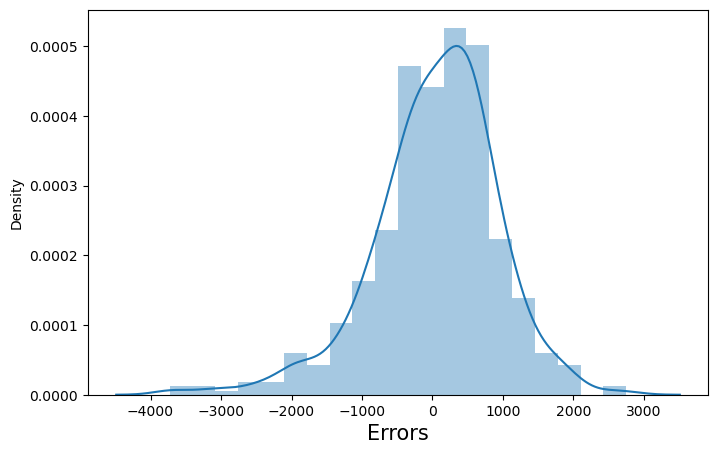

In [52]:
fig = plt.figure()
plt.figure(figsize=(8,5))
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 15)               
plt.xlabel('Errors', fontsize = 15)
plt.show()

In [53]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2_score(y_test, predicted_value))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1),4)
print(adjusted_r2)

0.7987


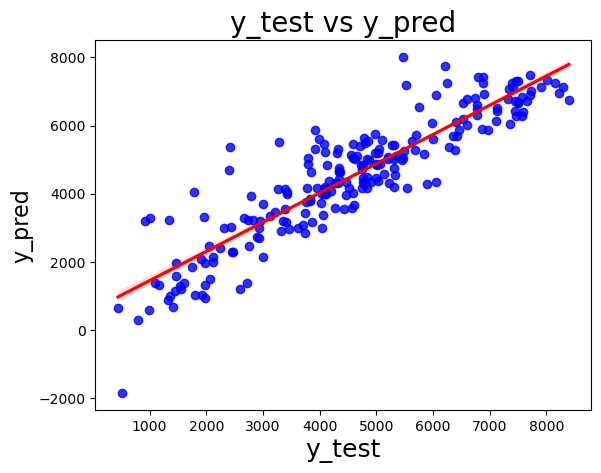

In [54]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=predicted_value, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

#Train dataset R^2          : 0.835
#Test dataset R^2           : 0.808
#Train dataset Adjusted R^2 : 0.831
#Test dataset Adjusted R^2  : 0.798